Created by Anna Vorreuther

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
from scipy import stats

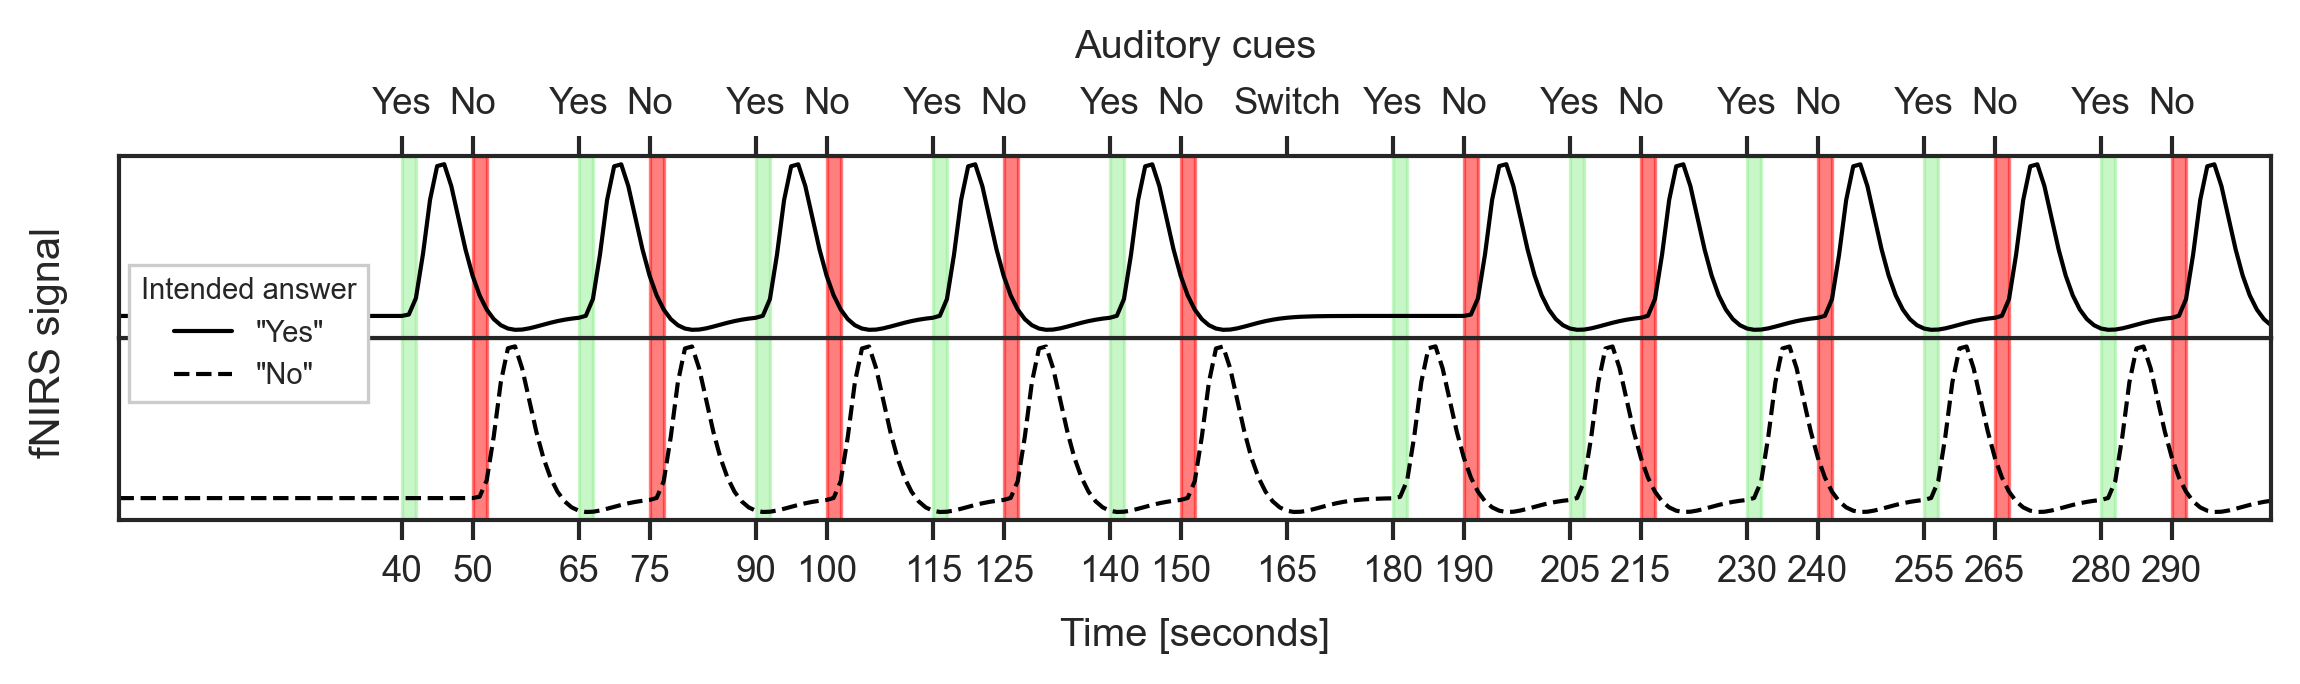

In [8]:
# plot configs
font = {'family' : 'Arial',
        'weight' : 'regular',
        'size'   : 14}

sns.set_style("ticks")
sns.set_context("paper")
rc('font', **font)

linePlotParams = {
   # 'color':'k',
    'linewidth':1,
    'legend':False,
                 }

# read in HRF curve datapoints and create figure
df = pd.read_csv("/figure2_timecourses/Yes-No_timescourses.csv", sep=";", index_col=False)
#f = plt.figure(figsize=(8,2),dpi=300)
f,(ax1,ax2) = plt.subplots(2,1, figsize=(8,2.5),dpi=300, sharey=True)

# plot expected HRF for each possible answer option
sns.lineplot(ax= ax1, x=df['Time'], y=df['Answering "YES"'], linestyle='-', color='k', label='"Yes"', **linePlotParams)
sns.lineplot(ax= ax2, x=df['Time'], y=df['Answering "NO"'], linestyle='--', color='k', label='"No"', **linePlotParams)

# two x-axes, one for time and one for auditory cues
#ax = f.gca()
#ax.set_xlim(df.Time.iloc[0],df.Time.iloc[-1])
#ax2 = ax.twiny()
#ax2.set_xlim(ax.get_xlim())

ax1.set_xlim(df.Time.iloc[0],df.Time.iloc[-1])
ax2.set_xlim(ax1.get_xlim())

# set x-ticks for time and cue axes
ticks = []
for tp in range(len(df['Time'])):
    if df['Answering "NO"'][tp] in [0.003679,0.000392, 0.00335] or df['Answering "YES"'][tp] in [0.003679,0.000392,0.00335]:
        ticks.append(df['Time'][tp]-1)

# insert a tick on axis for switch cue
ticks.insert(10, 165)

ax1.set_xticks(ticks)
ax2.set_xticks(ticks)
ax2.set_xticklabels(ticks)

# define lower x-axis labels (auditory cues)
labels = [item.get_text() for item in ax1.get_xticklabels()]
hd = []
for ax in f.axes:
    for l in range(len(ticks)):
        if l == 10:
            labels[l] = "Switch"
        else:
            if l % 2 == 0 and l < 11:
                labels[l] = "Yes"
                c = "lightgreen"
            elif l % 2 == 1  and l < 11:
                labels[l] = "No"
                c = "red"
            elif l % 2 == 1 and l >= 11:
                labels[l] = "Yes"
                c = "lightgreen"
            elif l % 2 == 0  and l >= 11:
                labels[l] = "No"
                c = "red"
            # marks the time frame in which an answer is encoded (2 seconds long)
            ax.axvspan(ticks[l], ticks[l]+2, alpha=0.5, color=c)
            
    ax.set_yticklabels([])
    ax.set_yticks([])
    hd.append(ax.get_legend_handles_labels()[0])
        
f.supylabel("fNIRS signal", fontsize=10, verticalalignment='center', y=0.5, x=0.04)
ax1.set_ylabel(None)
ax2.set_ylabel(None)
f.align_labels()
    
ax1.set_xticklabels(labels)
ax1.xaxis.tick_top()
#ax1.xaxis.set_ticks_position('top')

# name axes and add grid & legend
lpad = 7
lfontsize = 7
ax1.legend(handles=[item for sublist in hd for item in sublist], title="Intended answer", loc=(0.005,-.35), 
           fontsize=lfontsize, title_fontsize=lfontsize, framealpha=1, fancybox=False)
ax1.set_zorder(1)
ax2.set_xlabel("Time [seconds]", labelpad=lpad)
ax1.xaxis.set_label_position('top') 
ax1.set_xlabel("Auditory cues", labelpad=lpad)

ax1.grid(1, axis="y", alpha=0.5)

# plot layout
plt.subplots_adjust(left=0.2, bottom=0.2)
plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)

plt.savefig("figure2_answer_encoding_scheme.svg", format="svg")